In [1]:
# save 2 files 1 for training the other for testing
# plot each activity count
# boxplot the activities, one plot for gyro one plot for accel

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyarrow

     |████████████████████████████████| 64.2MB 7.0MB/s eta 0:00:014 |█████▊                          | 11.5MB 15.1MB/s eta 0:00:04/s eta 0:00:05     |██████████████████▏             | 36.5MB 7.0MB/s eta 0:00:04     |████████████████████████████████| 64.2MB 7.0MB/s eta 0:00:01


In [4]:
!matplotlib inline

/bin/sh: 1: matplotlib: not found


In [5]:
df = pd.read_parquet('classifyactivities.parquet', engine='pyarrow')

In [6]:
df.z= df.z.astype(float)#previously noted z was string, changed it to float

df.head()

,subjectid,activity,timestamp,x,y,z,type,device
0,1639,A,1.849641e+14,8.288427,-4.857087,9.167398,phone,accel
1,1639,A,1.849642e+14,14.506168,-13.624654,14.149732,phone,accel
2,1639,A,1.849642e+14,8.800786,-3.229030,4.376601,phone,accel
3,1639,A,1.849643e+14,18.195633,-11.740417,0.481235,phone,accel
4,1639,A,1.849643e+14,16.316185,-3.992780,-0.986411,phone,accel


In [13]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,subjectid,timestamp,x,y,z
count,15630426.000000,15630426.000000,15630426.000000,15630426.000000,15630426.000000
mean,1626.266503,590447296652959.750000,0.129160,-1.607849,0.557048
std,14.788170,603445698477162.875000,4.792884,5.025267,3.970900
min,1600.000000,268102711042.000000,-78.477610,-78.477610,-78.477610
25%,1614.000000,107914533221983.000000,-1.423934,-4.157089,-0.640274
50%,1627.000000,370481792926658.000000,-0.001968,-0.129028,0.004527
75%,1639.000000,940768274718381.500000,1.293311,0.121321,1.786685
max,1650.000000,2724599224330653.000000,78.477610,64.411660,69.081950


K    901381
A    886762
P    882716
E    882587
M    882417
D    875030
S    872243
G    871710
Q    871159
R    869905
H    869704
O    868766
B    862281
I    861398
L    857571
C    841230
J    840358
F    833208
Name: activity, dtype: int64


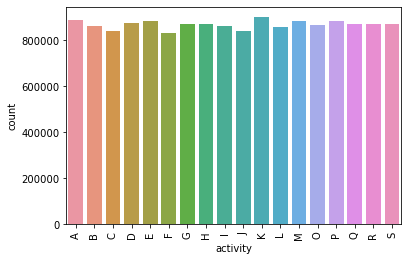

In [14]:
labels= df['activity']
print(labels.value_counts())
sns.countplot(labels)
plt.xticks(rotation= 90)
plt.show()

In [17]:
plt.figure(figsize= (7, 7))
sns.boxplot(x='activity', y='x,y,z',data=df, showfliers=False, saturation=1)
plt.title('Feature: 504fBodyAccMagstd()')
plt.xticks(rotation= 90)
plt.grid()

ValueError: Could not interpret input 'x,y,z'

<Figure size 504x504 with 0 Axes>

In [ ]:
from pyspark.ml.feature import StringIndexer
#transform data, integer representation
indexer = StringIndexer(inputCol="type",outputCol="typeindex")
indexed = indexer.fit(df).transform(df)
indexed.show()

In [16]:
df.device.value_counts()

accel    8581449
gyro     7048977
Name: device, dtype: int64

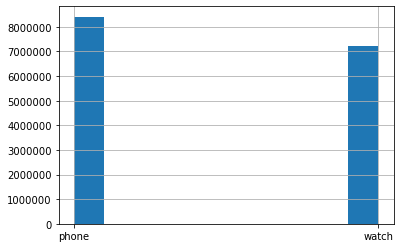

In [18]:
df.type.hist()

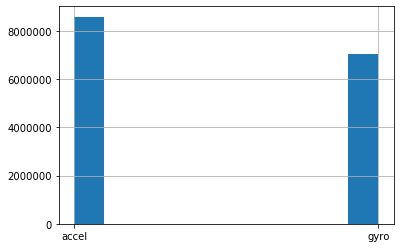

In [19]:
df.device.hist()

In [22]:
df.columns

Index(['subjectid', 'activity', 'timestamp', 'x', 'y', 'z', 'type', 'device'], dtype='object')

In [ ]:
from pandas.plotting import scatter_matrix
columns = ['x','y','z']
scatter_matrix(df[columns],    figsize  = [7, 7])
pyplot.show()

NameError: name 'pyplot' is not defined